In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import *
from sklearn.metrics import confusion_matrix
import seaborn as sns
#cross validation
from sklearn.model_selection import KFold
# fix random seed for reproducibility
seed=7
np.random.seed(seed)
var_w=lambda shape: initializers.RandomUniform(-0.5,0.5)

In [10]:
#méthode essai pour cross validation
# load pima indians dataset
dataset = pd.read_csv("/Users/malush/Documents/projet AFD 2018/AFD/train_cap2018.csv", sep=",")
# split into input (X) and output (Y) variables
scaler = StandardScaler()
X=dataset.iloc[:,1:59].astype(float)
Y=dataset.iloc[:,59]
Y_c=Y

In [11]:
#Suppression des NaN
w = np.isnan(X)
X[w] = 0#X.mean() à changer
#Normalisation des données
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.transform(X)
X_c=X
X, X_test, Y, Y_test = train_test_split(X, Y,test_size=0.33)

In [14]:
#Définition du modèle
def create_mdl():
    #création 
    model = Sequential()
    model.add(Dense(120, input_dim=58,kernel_initializer='normal', activation='relu'))#
    model.add(Dense(500, activation='relu'))
    model.add(Dense(6,kernel_initializer='normal', activation='softmax'))# a revoir la fct
    #compilation 
    sgd = SGD(lr=0.01)
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])#adamax
    return model

model=create_mdl()

    

In [15]:
#Pour encoder Y
encoder = LabelEncoder()
encoder.fit(Y)
#converti le Y de chaine de caractères à numérique
Y_numerique = encoder.transform(Y)
print(Y_numerique)
# convert integers to dummy variables (i.e. one hot encoded)
y_encode_binaire = np_utils.to_categorical(Y_numerique)#6
encodert = LabelEncoder()
encodert.fit(Y_test)
#converti le Y de chaine de caractères à numérique
Y_numerique_t = encodert.transform(Y_test)
# convert integers to dummy variables (i.e. one hot encoded)
y_encode_binaire_t = np_utils.to_categorical(Y_numerique_t)#6
historique=model.fit(X, y_encode_binaire, epochs=100, batch_size=30)


[0 1 1 ... 1 0 0]
Epoch 1/100
18297/18297 [==============================] - 2s 102us/step - loss: 0.7079 - categorical_accuracy: 0.7277
Epoch 2/100
18297/18297 [==============================] - 2s 90us/step - loss: 0.5852 - categorical_accuracy: 0.7763
Epoch 3/100
18297/18297 [==============================] - 2s 89us/step - loss: 0.5473 - categorical_accuracy: 0.7898
Epoch 4/100
18297/18297 [==============================] - 2s 89us/step - loss: 0.5251 - categorical_accuracy: 0.7982
Epoch 5/100
18297/18297 [==============================] - 2s 88us/step - loss: 0.5033 - categorical_accuracy: 0.8060
Epoch 6/100
18297/18297 [==============================] - 2s 93us/step - loss: 0.4867 - categorical_accuracy: 0.8137
Epoch 7/100
18297/18297 [==============================] - 2s 94us/step - loss: 0.4774 - categorical_accuracy: 0.8148
Epoch 8/100
18297/18297 [==============================] - 2s 92us/step - loss: 0.4608 - categorical_accuracy: 0.8241
Epoch 9/100
18297/18297 [============

18297/18297 [==============================] - 2s 107us/step - loss: 0.0548 - categorical_accuracy: 0.9815
Epoch 70/100
18297/18297 [==============================] - 2s 107us/step - loss: 0.0630 - categorical_accuracy: 0.9793
Epoch 71/100
18297/18297 [==============================] - 2s 90us/step - loss: 0.0767 - categorical_accuracy: 0.9749
Epoch 72/100
18297/18297 [==============================] - 2s 105us/step - loss: 0.0524 - categorical_accuracy: 0.9831
Epoch 73/100
18297/18297 [==============================] - 2s 96us/step - loss: 0.0580 - categorical_accuracy: 0.9810
Epoch 74/100
18297/18297 [==============================] - 2s 93us/step - loss: 0.0896 - categorical_accuracy: 0.9678
Epoch 75/100
18297/18297 [==============================] - 2s 89us/step - loss: 0.0456 - categorical_accuracy: 0.9860 0s - loss: 0.0453 - categorical_ac
Epoch 76/100
18297/18297 [==============================] - 2s 88us/step - loss: 0.0474 - categorical_accuracy: 0.9853
Epoch 77/100
18297/1829

dict_keys(['loss', 'categorical_accuracy'])


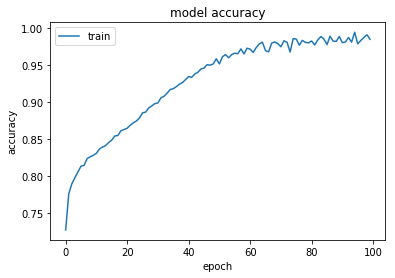

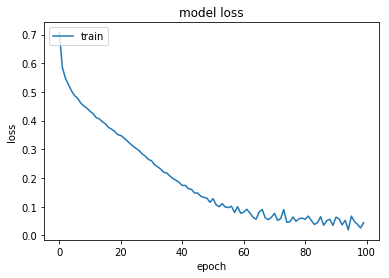

In [16]:
print(historique.history.keys())
# summarize history for accuracy
plt.plot(historique.history['categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historique.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [17]:
scores = model.evaluate(X, y_encode_binaire)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#print(scores)

18297/18297 [==============================] - 1s 30us/step

categorical_accuracy: 97.95%


(9013,)


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


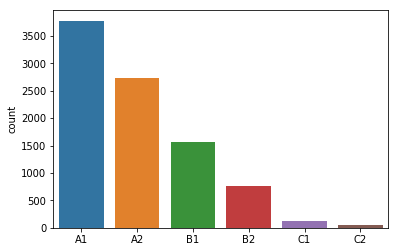

In [18]:
predictions = model.predict_classes(X_test)
classes = encoder.inverse_transform(predictions)

print(classes.shape)
sns.countplot(classes,label="Count")
plt.show()


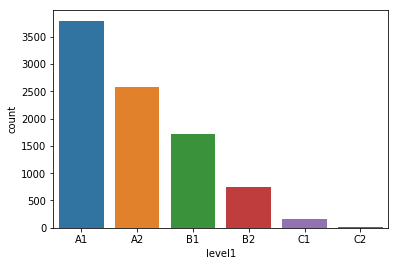

(9013,)

In [19]:
sns.countplot(Y_test,label="Count")
plt.show()
Y_test.shape

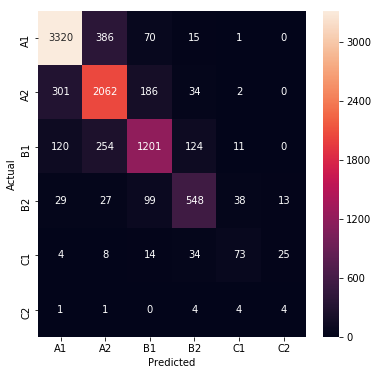

0.20026628203705754


In [21]:
mat = confusion_matrix(Y_test, classes)
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(mat, annot=True, fmt='d',
            xticklabels=['A1','A2','B1','B2','C1','C2'], yticklabels=['A1','A2','B1','B2','C1','C2'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#on calcule l'erreur de prédiction 
diagonal_sum = mat.trace()
sum_of_all_elements = mat.sum()
erreur=1-(diagonal_sum/sum_of_all_elements)

print(erreur)

In [167]:
#Cross validation algorithm 
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
for train_index, test_index in kfold.split(X_c, Y_c): 
    X_train, X_test = X_c[train_index], X_c[test_index]
    y_train, y_test = Y_c[train_index], Y_c[test_index]
    encoder = LabelEncoder()
    encoder.fit(y_train)
    Y_numerique = encoder.transform(y_train)
    y_encode_binaire = np_utils.to_categorical(Y_numerique)#6
    #test data
    encodert = LabelEncoder()
    encodert.fit(y_test)
    #converti le Y de chaine de caractères à numérique
    Y_numerique_t = encodert.transform(y_test)
    # convert integers to dummy variables (i.e. one hot encoded)
    y_encode_binaire_t = np_utils.to_categorical(Y_numerique_t)#6
    history=model.fit(X_train, y_encode_binaire, epochs=1, batch_size=30)
    

Epoch 1/1
24576/24576 [==============================] - 3s 140us/step - loss: 0.2922 - categorical_accuracy: 0.8853
Epoch 1/1
24578/24578 [==============================] - 3s 141us/step - loss: 0.2800 - categorical_accuracy: 0.8910
Epoch 1/1
24578/24578 [==============================] - 4s 143us/step - loss: 0.2770 - categorical_accuracy: 0.8910
Epoch 1/1
24579/24579 [==============================] - 3s 142us/step - loss: 0.2714 - categorical_accuracy: 0.8944
Epoch 1/1
24579/24579 [==============================] - 4s 143us/step - loss: 0.2607 - categorical_accuracy: 0.8994
Epoch 1/1
24579/24579 [==============================] - 4s 143us/step - loss: 0.2526 - categorical_accuracy: 0.9025
Epoch 1/1
24579/24579 [==============================] - 4s 150us/step - loss: 0.2479 - categorical_accuracy: 0.9031
Epoch 1/1
24580/24580 [==============================] - 4s 145us/step - loss: 0.2367 - categorical_accuracy: 0.9083
Epoch 1/1
24581/24581 [==============================] - 3s 130u

dict_keys(['loss', 'categorical_accuracy'])


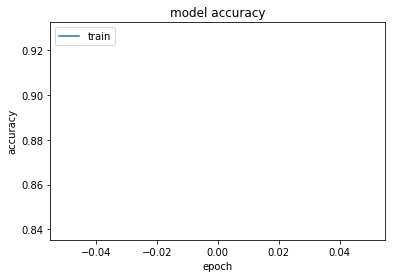

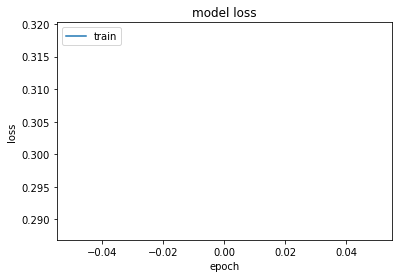

In [165]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()